In [37]:
import numpy as np
import pandas as pd
import json
import os
from PIL import Image

import matplotlib.pyplot as plt
from tqdm import tqdm

%matplotlib inline

In [38]:
def load_json(jfile):
    with open(jfile, 'rb') as f:
        return json.load(f)

In [39]:
PATH = '/media/nas/BasesDeDonnees/cocodataset/'
#path = '../cocodataset/'

#train_2014 = PATH+'train_2014'
#valid_2014 = PATH+'valid_2014'
#test_2014 = PATH+'test_2014'

#test_2015 = PATH+'test_2015'

train_2017 = PATH+'train_2017'
valid_2017 = PATH+'valid_2017'
#test_2017 = PATH+'test_2017'

#train_2014 = PATH+'annotations/instances_train2017.json'
#valid_2014 = PATH+'annotations/instances_val2017.json'
#test_2014 = PATH+'annotations/image_nfi_test2017.json'

train_2017 = PATH+'annotations/instances_train2017.json'
valid_2017 = PATH+'annotations/instances_val2017.json'
#test_2017 = PATH+'annotations/image_nfi_test2017.json'

#train_2014_data = load_json(train_2014)
#valid_2014_data = load_json(valid_2014)
train_2017_data = load_json(train_2017)
valid_2017_data = load_json(valid_2017)

In [40]:
import os

paths = ['COCO1',
         'COCO1/train',
         'COCO1/train/images',
         'COCO1/train/labels',
         'COCO1/valid',
         'COCO1/valid/images',
         'COCO1/valid/labels',
         'COCO1/support',
         'COCO1/support/images']

        #  'COCO2',
        #  'COCO2/train',
        #  'COCO2/train/images',
        #  'COCO2/train/labels',
        #  'COCO2/valid',
        #  'COCO2/valid/images',
        #  'COCO2/valid/labels',
        #  'COCO2/support',
        #  'COCO2/support/images',
        #  'COCO3',
        #  'COCO3/train',
        #  'COCO3/train/images',
        #  'COCO3/train/labels',
        #  'COCO3/valid',
        #  'COCO3/valid/images',
        #  'COCO3/valid/labels',
        #  'COCO3/support',
        #  'COCO3/support/images',
        #  'COCO4',
        #  'COCO4/train',
        #  'COCO4/train/images',
        #  'COCO4/train/labels',
        #  'COCO4/valid',
        #  'COCO4/valid/images',
        #  'COCO4/valid/labels',
        #  'COCO4/support',
        #  'COCO4/support/images']

for path in paths:
    if not os.path.exists(path):
        os.mkdir(path)

In [41]:
train_2017_data.keys()

dict_keys(['info', 'licenses', 'images', 'annotations', 'categories'])

In [42]:
images_df = pd.DataFrame(train_2017_data['images'])
anns_df = pd.DataFrame(train_2017_data['annotations'])
category = pd.DataFrame(train_2017_data['categories'])

all_train = pd.merge(anns_df, images_df, left_on='image_id', right_on='id')

images_df = pd.DataFrame(valid_2017_data['images'])
anns_df = pd.DataFrame(valid_2017_data['annotations'])
category = pd.DataFrame(valid_2017_data['categories'])

all_valid = pd.merge(anns_df, images_df, left_on='image_id', right_on='id')

In [43]:
anns_df['category_id'].unique()

array([18, 64, 72, 16, 17, 19, 20, 21, 44, 63, 62, 67,  2,  3,  4,  5,  6,
        7,  9,  1, 13, 28, 32, 54, 65, 77, 82, 85, 90,  8, 10, 11, 14, 15,
       34, 35, 36, 41, 42, 46, 47, 48, 49, 50, 51, 52, 53, 55, 56, 57, 59,
       61, 70, 73, 74, 75, 76, 78, 79, 80, 81, 84, 86, 87, 88, 89, 27, 31,
       33, 22, 24, 38, 58, 60, 25, 39, 40, 37, 23, 43])

In [44]:
all_valid.head()

,segmentation,area,iscrowd,image_id,bbox,category_id,id_x,license,file_name,coco_url,height,width,date_captured,flickr_url,id_y
0,"[[510.66, 423.01, 511.72, 420.03, 510.45, 416....",702.10575,0,289343,"[473.07, 395.93, 38.65, 28.67]",18,1768,2,000000289343.jpg,http://images.cocodataset.org/val2017/00000028...,640,529,2013-11-15 00:35:14,http://farm5.staticflickr.com/4029/4669549715_...,289343
1,"[[204.01, 306.23, 206.07, 295.92, 216.38, 281....",5463.68640,0,289343,"[204.01, 235.08, 60.84, 177.36]",1,201376,2,000000289343.jpg,http://images.cocodataset.org/val2017/00000028...,640,529,2013-11-15 00:35:14,http://farm5.staticflickr.com/4029/4669549715_...,289343
2,"[[268.92, 556.53, 268.92, 606.24, 255.93, 604....",10324.90270,0,289343,"[0.43, 499.79, 339.79, 106.45]",15,575188,2,000000289343.jpg,http://images.cocodataset.org/val2017/00000028...,640,529,2013-11-15 00:35:14,http://farm5.staticflickr.com/4029/4669549715_...,289343
3,"[[217.31, 448.75, 219.7, 411.99, 219.7, 409.12...",1528.36420,0,289343,"[204.42, 304.1, 52.51, 152.76]",2,2168354,2,000000289343.jpg,http://images.cocodataset.org/val2017/00000028...,640,529,2013-11-15 00:35:14,http://farm5.staticflickr.com/4029/4669549715_...,289343
4,"[[289.74, 443.39, 302.29, 445.32, 308.09, 427....",27718.47630,0,61471,"[272.1, 200.23, 151.97, 279.77]",18,1773,1,000000061471.jpg,http://images.cocodataset.org/val2017/00000006...,480,640,2013-11-15 01:18:25,http://farm1.staticflickr.com/11/12252917_d009...,61471


# PROCESSING CLasses


In [45]:
print(all_train['category_id'].unique().shape)
print(all_valid['category_id'].unique().shape)

(80,)
(80,)


In [46]:
coco_classes = all_train['category_id'].unique()
coco_classes.sort()
print(coco_classes)
split1 = coco_classes[[(i-1) for i in [1,5,9,13,17,21,25,29,33,37,41,45,49,53,57,61,65,69,73,77]]]
#split2 = coco_classes[[(i-1) for i in [2,6,10,14,18,22,26,30,34,38,42,46,50,54,58,62,66,70,74,78]]]
#split3 = coco_classes[[(i-1) for i in [3,7,11,15,19,23,27,31,35,39,43,47,51,55,59,63,67,71,75,79]]]
#split4 =coco_classes[[(i-1) for i in  [4,8,12,16,20,24,28,32,36,40,44,48,52,56,60,64,68,72,76,80]]]

print(len(split1))#,len(split2),len(split3),len(split4))

[ 1  2  3  4  5  6  7  8  9 10 11 13 14 15 16 17 18 19 20 21 22 23 24 25
 27 28 31 32 33 34 35 36 37 38 39 40 41 42 43 44 46 47 48 49 50 51 52 53
 54 55 56 57 58 59 60 61 62 63 64 65 67 70 72 73 74 75 76 77 78 79 80 81
 82 84 85 86 87 88 89 90]
20


In [47]:
split1_train = all_train[-all_train['category_id'].isin(split1)]
#split2_train = all_train[-all_train['category_id'].isin(split2)]
#split3_train = all_train[-all_train['category_id'].isin(split3)]
#split4_train = all_train[-all_train['category_id'].isin(split4)]

split1_valid = all_valid[all_valid['category_id'].isin(split1)]
#split2_valid = all_valid[all_valid['category_id'].isin(split2)]
#split3_valid = all_valid[all_valid['category_id'].isin(split3)]
#split4_valid = all_valid[all_valid['category_id'].isin(split4)]


# PROCESSING JSON

In [48]:
print(split1_train['category_id'].unique().shape)
print(split1_valid['category_id'].unique().shape)

# print(split2_train['category_id'].unique().shape)
# print(split2_valid['category_id'].unique().shape)

# print(split3_train['category_id'].unique().shape)
# print(split3_valid['category_id'].unique().shape)

# print(split4_train['category_id'].unique().shape)
# print(split4_valid['category_id'].unique().shape)

(60,)
(20,)


In [49]:
category['name'].unique()

array(['person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
       'train', 'truck', 'boat', 'traffic light', 'fire hydrant',
       'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog',
       'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe',
       'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee',
       'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat',
       'baseball glove', 'skateboard', 'surfboard', 'tennis racket',
       'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl',
       'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot',
       'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch',
       'potted plant', 'bed', 'dining table', 'toilet', 'tv', 'laptop',
       'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven',
       'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase',
       'scissors', 'teddy bear', 'hair drier', 'toothbrush'], dtype=object)

([<matplotlib.axis.YTick at 0x7fbb9004c9a0>,
 [Text(0, 0, 'person'),
  Text(0, 1, 'airplane'),
  Text(0, 2, 'boat'),
  Text(0, 3, 'parking meter'),
  Text(0, 4, 'dog'),
  Text(0, 5, 'elephant'),
  Text(0, 6, 'backpack'),
  Text(0, 7, 'suitcase'),
  Text(0, 8, 'sports ball'),
  Text(0, 9, 'skateboard'),
  Text(0, 10, 'wine glass'),
  Text(0, 11, 'spoon'),
  Text(0, 12, 'sandwich'),
  Text(0, 13, 'hot dog'),
  Text(0, 14, 'chair'),
  Text(0, 15, 'dining table'),
  Text(0, 16, 'mouse'),
  Text(0, 17, 'microwave'),
  Text(0, 18, 'refrigerator'),
  Text(0, 19, 'scissors')])

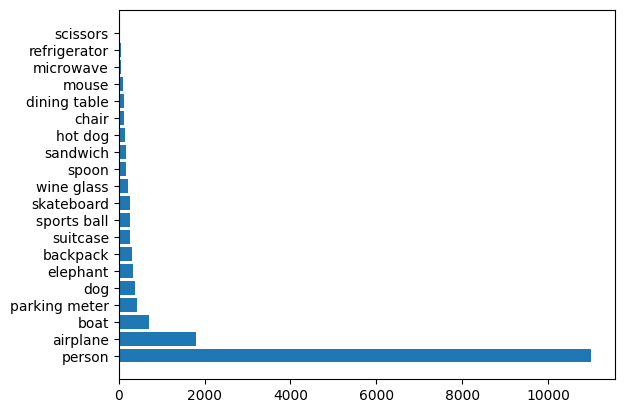

In [50]:
plt.figure()

label = np.arange(len(split1_valid['category_id'].unique()))
l = [(i-1) for i in [1,5,9,13,17,21,25,29,33,37,41,45,49,53,57,61,65,69,73,77]]
names = category['name'].unique()[l]

plt.barh(label, split1_valid['category_id'].value_counts())
plt.yticks(label, names)


In [51]:
len(split1_train['file_name'].unique())

106498

# Base on DANA support IMAGE

In [52]:
#!wget -O support.zip "https://drive.google.com/uc?export=download&id=1nl9-DEpBBJ5w6hxVdijY6hFxoQdz8aso&confirm=yes"

In [53]:
#!unzip support.zip

In [54]:
category.head()

,supercategory,id,name
0,person,1,person
1,vehicle,2,bicycle
2,vehicle,3,car
3,vehicle,4,motorcycle
4,vehicle,5,airplane


In [55]:
from PIL import Image, ImageOps

def resize_with_padding(img, expected_size):
    width, height = img.size
    ratio = width / height
    if width < height:
        img = img.resize((int(ratio*expected_size[0]),int(expected_size[0])))
    else:
        img = img.resize((int(expected_size[1]),int((1/ratio)*expected_size[1])))
        
    img.thumbnail((expected_size[0], expected_size[1]))
    delta_width = expected_size[0] - img.size[0]
    delta_height = expected_size[1] - img.size[1]
    pad_width = delta_width // 2
    pad_height = delta_height // 2
    padding = (pad_width, pad_height, delta_width - pad_width, delta_height - pad_height)
    return ImageOps.expand(img, padding)


In [73]:
#TODO support for train:
import glob

def saveSupport(path):
    for row in tqdm(category.iloc(),total=len(category)):
        name = row['name']
        c = row['id']
        liste = glob.glob('supports/all/'+name+'/*')
        f = liste[2]
        image = Image.open(f)
        image = resize_with_padding(image, (640,640))
        image.save(path+str(c)+'.png')

In [74]:
saveSupport('COCO1/support/images/')

100%|██████████| 80/80 [00:12<00:00,  6.54it/s]


In [58]:
def saveImage(pd, folder, path):
    list_image = pd['file_name'].unique()
    for name in tqdm(list_image):
        image = Image.open(PATH+folder+name)
        image = resize_with_padding(image, (640,640))
        for c in pd.loc[pd['file_name'] == name]['category_id'].unique():
            image.save(path+name[:-4]+'.'+str(c)+'.png')
        

In [59]:
# saveImage(split1_train,'train2017/','COCO1/train/images/')
# saveImage(split1_valid,'val2017/','COCO1/valid/images/')

In [60]:
# saveImage(split2_train,'train2017/','COCO2/train/images/')
# saveImage(split2_valid,'val2017/','COCO2/valid/images/')

In [61]:
# saveImage(split3_train,'train2017/','COCO3/train/images/')
# saveImage(split3_valid,'val2017/','COCO3/valid/images/')

In [62]:
# saveImage(split4_train,'train2017/','COCO4/train/images/')
# saveImage(split4_valid,'val2017/','COCO4/valid/images/')

In [63]:
def resize_label_with_padding(old_size, expected_size, bbox):
    (x,y,w,h) = bbox

    ratio = old_size[0] / old_size[1]
    if old_size[0] < old_size[1]:
        new = (int(ratio*expected_size[0]),int(expected_size[0]))
    else:
        new = (int(expected_size[1]),int((1/ratio)*expected_size[1]))

    delta_width = expected_size[0] - new[0]
    delta_height = expected_size[1] - new[1]

    pad_width = delta_width // 2
    pad_height = delta_height // 2

    x_t = (pad_width +  (x/old_size[0])*new[0] + ((w/old_size[0])*new[0])/2 ) / expected_size[0]
    y_t = (pad_height + (y/old_size[1])*new[1] + ((h/old_size[1])*new[1])/2) / expected_size[1]
    w_t = (w/old_size[0])*new[0] / expected_size[0]
    h_t = (h/old_size[1])*new[1] / expected_size[1]
    
    return x_t,y_t,w_t,h_t

In [64]:
def savetxt(pd, path):
    list_image = pd['file_name'].unique()
    for name in tqdm(list_image):
        for c in pd.loc[pd['file_name'] == name]['category_id'].unique():
            annotation = pd.loc[pd['file_name'] == name]
            annotation = annotation[annotation['category_id'] == c]
            bbox = annotation['bbox']

            with open(path+name[:-4]+'.'+str(c)+'.txt', 'wt') as f:
                for box,width,height in zip(bbox,annotation['width'],annotation['height']):
                    x,y,w,h = resize_label_with_padding((width,height), (640,640), box)
                    s = '0'+' '+str(x)+' '+str(y)+' '+str(w)+' '+str(h)+' \n'
                    f.write(s)

In [65]:
# savetxt(split1_train,'COCO1/train/labels/')
# savetxt(split1_valid,'COCO1/valid/labels/')

In [66]:
# savetxt(split2_train,'COCO2/train/labels/')
# savetxt(split2_valid,'COCO2/valid/labels/')

In [67]:
# savetxt(split3_train,'COCO3/train/labels/')
# savetxt(split3_valid,'COCO3/valid/labels/')

In [68]:
# savetxt(split4_train,'COCO4/train/labels/')
# savetxt(split4_valid,'COCO4/valid/labels/')

In [69]:
with open('COCO1/data.yaml', 'wt') as f:
    f.write('train: ../train/images \n')
    f.write('val: ../valid/images \n')
    f.write('support: ../support/images \n')
    f.write(' \n')
    f.write('nc: 1 \n')
    f.write('names: [\'object\']')

In [70]:
# with open('COCO2/data.yaml', 'a') as f:
#     f.write('train: ../train/images \n')
#     f.write('val: ../valid/images \n')
#     f.write('support: ../support/images \n')
#     f.write(' \n')
#     f.write('nc: 1 \n')
#     f.write('names: [\'object\']')

In [71]:
# with open('COCO3/data.yaml', 'a') as f:
#     f.write('train: ../train/images \n')
#     f.write('val: ../valid/images \n')
#     f.write('support: ../support/images \n')
#     f.write(' \n')
#     f.write('nc: 1 \n')
#     f.write('names: [\'object\']')

In [72]:
# with open('COCO4/data.yaml', 'a') as f:
#     f.write('train: ../train/images \n')
#     f.write('val: ../valid/images \n')
#     f.write('support: ../support/images \n')
#     f.write(' \n')
#     f.write('nc: 1 \n')
#     f.write('names: [\'object\']')